In [1]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential,load_model,save_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
t="/content/drive/MyDrive/Dataset.zip"
from zipfile import ZipFile 
with ZipFile("/content/drive/MyDrive/Dataset.zip", 'r') as zip:
  print("please wait until extraction is finished......")
  zip.extractall("/content/ds")
  print("extraction is finised")
  tra="/content/ds/Train/"
tes="/content/ds/Test/"
val="/content/ds/Validation"

please wait until extraction is finished......
extraction is finised


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [5]:
test_datagen = ImageDataGenerator( rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(tra,
                                                    batch_size =64 ,
                                                    class_mode = 'binary',
                                                    seed=1337,
                                                    target_size = (64,64) ) # this is train data     

validation_generator =  test_datagen.flow_from_directory(val,
                                                          batch_size  =64,
                                                          class_mode  = 'binary',
                                                          seed=1337,
                                                          target_size = (64,64)) # validation data

Found 160000 images belonging to 2 classes.
Found 22598 images belonging to 2 classes.


In [6]:
model=Sequential()
model.add(Conv2D(512, (3, 3),strides=(1,1), activation='relu', padding='same',input_shape=(64, 64, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(250, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3),strides=(1,1), activation='relu', padding='same'))
model.add(MaxPooling2D(2,strides=(2,2), padding='same'))
model.add(Flatten()) 
model.add(Dense(2000 , activation='relu'))
model.add(layers.Dropout(.2))
model.add(Dense(2000, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 512)       14336     
                                                                 
 dropout (Dropout)           (None, 64, 64, 512)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 250)       1152250   
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 250)      1000      
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       288128    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        73792     
                                                        

In [7]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit_generator(generator=train_generator,validation_data=validation_generator,epochs=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
2500/2500 [==============================] - 865s 339ms/step - loss: 0.4261 - accuracy: 0.8014 - val_loss: 0.2095 - val_accuracy: 0.9140
Epoch 2/15
2500/2500 [==============================] - 845s 338ms/step - loss: 0.2411 - accuracy: 0.8992 - val_loss: 0.2030 - val_accuracy: 0.9200
Epoch 3/15
2500/2500 [==============================] - 840s 336ms/step - loss: 0.2031 - accuracy: 0.9162 - val_loss: 0.1479 - val_accuracy: 0.9403
Epoch 4/15
2500/2500 [==============================] - 839s 336ms/step - loss: 0.1826 - accuracy: 0.9262 - val_loss: 0.1371 - val_accuracy: 0.9434
Epoch 5/15
2500/2500 [==============================] - 840s 336ms/step - loss: 0.1659 - accuracy: 0.9334 - val_loss: 0.1292 - val_accuracy: 0.9492
Epoch 6/15
2500/2500 [==============================] - 840s 336ms/step - loss: 0.1548 - accuracy: 0.9385 - val_loss: 0.1115 - val_accuracy: 0.9581
Epoch 7/15
2500/2500 [==============================] - 841s 336ms/step - loss: 0.1463 - accuracy: 0.9420 - val_

In [9]:
model.save("./contant/modelsmall.h5")

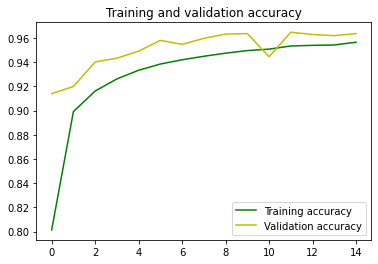

<Figure size 432x288 with 0 Axes>

In [10]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'y', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()